## Class to process page 5 of the survey

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd
plt.rcParams['figure.figsize'] = (10, 10)
from utils import *
from define import *
# import define

In [19]:
class Page5Processor:
    def __init__(self, xml_path):
        df = xml2csv(xml_path)

        self.all_checkbox = df.copy()

        self.all_checkbox_numpy =np.array(self.all_checkbox[['xmin', 'ymin', 'xmax', 'ymax']])
        question_of_row = [row.split('_') for row in self.all_checkbox['class']]
        self.question_of_row = [row[0] if len(row) == 2 else '_'.join(row[:3]) if len(row) == 4 else '_'.join(row[:2]) for row in question_of_row]

        
    def process(self, img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        extractor = CheckboxExtractor()
        checkboxes = extractor.detect_checkbox(gray)    
        tick_list = list(map(lambda x: extractor.is_ticked(gray[x[1]:x[3], x[0]:x[2]]), checkboxes))
        checkboxes = np.hstack([checkboxes, np.array(tick_list).reshape(-1,1)]) # [x1,y1,x2,y2,is_ticked]

        row_ids = []
        for i in range(len(checkboxes)):
            x1,y1,x2,y2,_is_tick = checkboxes[i]
            checkbox_coor = checkboxes[i:i+1, :]
            _iou = np_vec_no_jit_iou(checkbox_coor[:,:4], self.all_checkbox_numpy)
            row_ids += [np.argmax(_iou)]
        

        result_df = pd.DataFrame()

        _id_offset = 0

        for _question_id in [31,33,34,35,36]:
            question_name = f'{_question_id}'

            _checkbox_ids = list(filter(lambda x: ( str(_question_id) == self.question_of_row[row_ids[x]] ) and (checkboxes[x][4] == 1), range(len(checkboxes))))

            answers = []
            if len(_checkbox_ids) > 0:
                for _checkbox_id in _checkbox_ids:
                    answers += [ANSWER_TEXT_5[str(_question_id)][row_ids[_checkbox_id] - _id_offset]]
            result_df[question_name] = [', '.join(answers)]
            _id_offset += len(ANSWER_TEXT_5[str(_question_id)])
            if _question_id in [31, 33]:
                answers = []
                question_name = f'{_question_id}_1'
                _checkbox_ids = list(filter(lambda x: ( self.question_of_row[row_ids[x]] == question_name ) and (checkboxes[x][4] == 1), range(len(checkboxes))))
                for _checkbox_id in _checkbox_ids:
                    answers += [ANSWER_TEXT_5[question_name][row_ids[_checkbox_id] - _id_offset]]
                result_df[question_name.replace('_', '.')] = [', '.join(answers)]
                _id_offset += len(ANSWER_TEXT_5[question_name])




        return result_df

    


In [17]:
processor = Page5Processor('page5.xml')

img = cv2.imread('page5.jpg')
ret = processor.process(img)

xml to csv page5.xml


In [18]:
ret

,31,31.1,33,33.1,34,35,36
0,No,,No,,No,,


In [4]:
df = xml2csv('page5.xml')

df

xml to csv page5.xml


,filename,width,height,class,xmin,ymin,xmax,ymax
0,page5.jpg,1700,2200,31_1,295,230,337,260
1,page5.jpg,1700,2200,31_2,296,374,344,410
2,page5.jpg,1700,2200,31_1_1,380,299,425,336
3,page5.jpg,1700,2200,31_1_2,379,338,430,371
4,page5.jpg,1700,2200,33_1,295,821,344,862
5,page5.jpg,1700,2200,33_2,296,1221,344,1274
6,page5.jpg,1700,2200,33_1_1,432,892,479,933
7,page5.jpg,1700,2200,33_1_2,432,936,482,970
8,page5.jpg,1700,2200,33_1_3,435,974,483,1013
9,page5.jpg,1700,2200,33_1_4,431,1013,475,1043


In [5]:
all_checkbox = df.copy()
all_checkbox_numpy =np.array(all_checkbox[['xmin', 'ymin', 'xmax', 'ymax']])
question_of_row = [row.split('_') for row in all_checkbox['class']]
question_of_row = [row[0] if len(row) == 2 else '_'.join(row[:3]) if len(row) == 4 else '_'.join(row[:2]) for row in question_of_row]


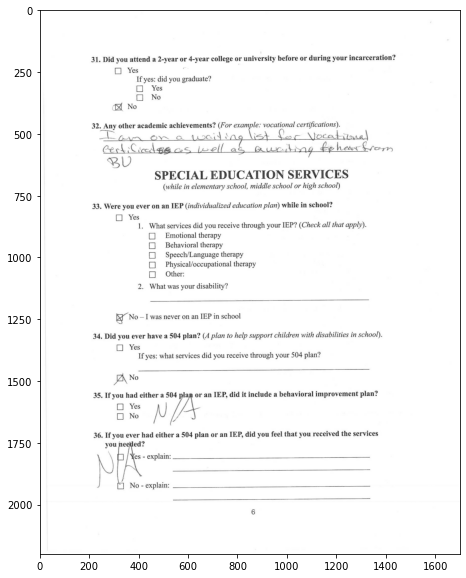

In [6]:
img = cv2.imread('page5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)

In [7]:
extractor = CheckboxExtractor()
checkboxes = extractor.detect_checkbox(gray)    
tick_list = list(map(lambda x: extractor.is_ticked(gray[x[1]:x[3], x[0]:x[2]]), checkboxes))
checkboxes = np.hstack([checkboxes, np.array(tick_list).reshape(-1,1)]) # [x1,y1,x2,y2,is_ticked]

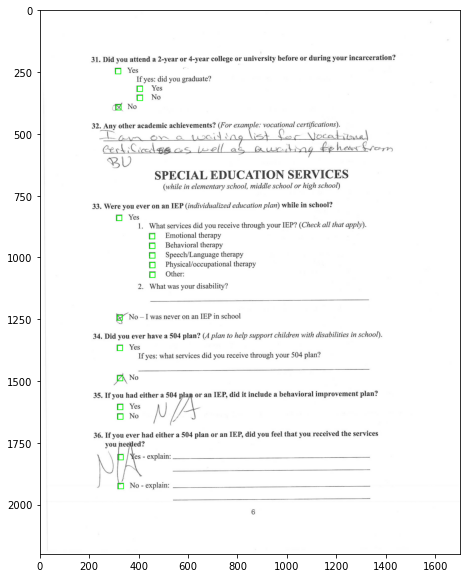

In [8]:
ret = img.copy()
  


row_ids = []
for i in range(len(checkboxes)):
  x1,y1,x2,y2,_is_tick = checkboxes[i]
  ret = cv2.rectangle(ret,(x1,y1), (x2,y2), (0,255,0), 2)
  checkbox_coor = checkboxes[i:i+1, :]
  _iou = np_vec_no_jit_iou(checkbox_coor[:,:4], all_checkbox_numpy)
  row_ids += [np.argmax(_iou)]

plt.imshow(ret)


In [9]:
ANSWER_TEXT_5 = {
    '31': ['Yes', 'No'],
    '31_1': ['Yes', 'No'],
    '33': ['Yes', 'No'],
    '33_1': ['Emotional therapy', 'Behavioral therapy', 'Speech/Language therapy', 'Physical occupational therapy', 'Other'],
    '34': ['Yes', 'No'],
    '35': ['Yes', 'No'],
    '36': ['Yes', 'No'],
        
}

In [11]:
result_df = pd.DataFrame()

_id_offset = 0

for _question_id in [31,33,34,35,36]:
    question_name = f'{_question_id}'

    _checkbox_ids = list(filter(lambda x: ( str(_question_id) == question_of_row[row_ids[x]] ) and (checkboxes[x][4] == 1), range(len(checkboxes))))

    answers = []
    if len(_checkbox_ids) > 0:
        for _checkbox_id in _checkbox_ids:
            answers += [ANSWER_TEXT_5[str(_question_id)][row_ids[_checkbox_id] - _id_offset]]
    result_df[question_name] = [', '.join(answers)]
    _id_offset += len(ANSWER_TEXT_5[str(_question_id)])
    if _question_id in [31, 33]:
        answers = []
        question_name = f'{_question_id}_1'
        _checkbox_ids = list(filter(lambda x: ( question_of_row[row_ids[x]] == question_name ) and (checkboxes[x][4] == 1), range(len(checkboxes))))
        for _checkbox_id in _checkbox_ids:
            answers += [ANSWER_TEXT_5[question_name][row_ids[_checkbox_id] - _id_offset]]
        result_df[question_name.replace('_', '.')] = [', '.join(answers)]
        _id_offset += len(ANSWER_TEXT_5[question_name])



In [12]:
result_df

,31,31.1,33,33.1,34,35,36
0,No,,No,,No,,
